Index(['Date', 'Daily minimum temperatures'], dtype='object')


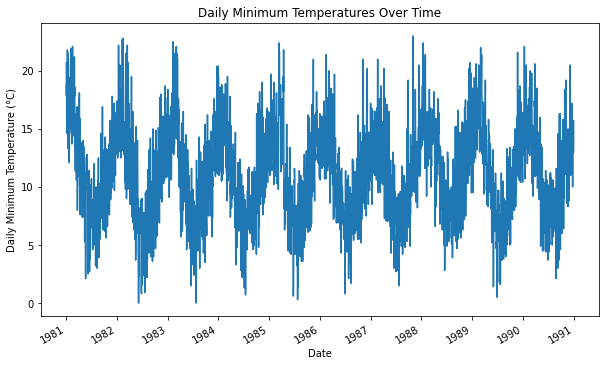

            Daily minimum temperatures  year  month  day  weekday  scaled_temp
Date                                                                          
1981-01-01                        20.7  1981      1    1        3     2.383408
1981-01-02                        17.9  1981      1    2        4     1.685074
1981-01-03                        18.8  1981      1    3        5     1.909539
1981-01-04                        14.6  1981      1    4        6     0.862037
1981-01-05                        15.8  1981      1    5        0     1.161323


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('D:/221501043/daily-minimum-temperatures-in-me.csv')


print(data.columns)


data.columns = data.columns.str.strip()  


data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce') 


data.set_index('Date', inplace=True)


data['Daily minimum temperatures'] = pd.to_numeric(data['Daily minimum temperatures'], errors='coerce')


data['Daily minimum temperatures'] = data['Daily minimum temperatures'].fillna(method='ffill')

z_scores = np.abs(stats.zscore(data['Daily minimum temperatures'].dropna()))  

data = data[z_scores < 3] 


data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.weekday




scaler = StandardScaler()
data['scaled_temp'] = scaler.fit_transform(data[['Daily minimum temperatures']])


'''
plt.scatter(data['Daily minimum temperatures'], data['Date'])
plt.title('niggggg')
plt.show()
'''

plt.figure(figsize=(10, 6))
data['Daily minimum temperatures'].plot()
plt.title('Daily Minimum Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Minimum Temperature (°C)')
plt.show()

print(data.head())



In [17]:
print(data['Daily minimum temperatures'].max())

23.0


In [18]:
print(data['Daily minimum temperatures'].min())

0.0


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('D:/221501043/daily-minimum-temperatures-in-me.csv')


print(data.columns)


data.columns = data.columns.str.strip()  


data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce') 


data.set_index('Date', inplace=True)


data['Daily minimum temperatures'] = pd.to_numeric(data['Daily minimum temperatures'], errors='coerce')


data['Daily minimum temperatures'] = data['Daily minimum temperatures'].fillna(method='ffill')

z_scores = np.abs(stats.zscore(data['Daily minimum temperatures'].dropna()))  

data = data[z_scores < 3] 


data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.weekday




scaler = StandardScaler()
data['scaled_temp'] = scaler.fit_transform(data[['Daily minimum temperatures']])

# Data preparation
penguins_grouped = data[['Date', 'Daily minimum temperatures']].groupby('Date').mean().reset_index()

# Creating a bar chart
plt.bar(penguins_grouped['Date'], penguins_grouped['Daily minimum temperatures'])
plt.title('Average penguin bill length by species')
plt.show()


Index(['Date', 'Daily minimum temperatures'], dtype='object')


KeyError: "['Date'] not in index"